In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [98]:
df = pd.read_csv(
    "/content/drive/MyDrive/finalPortfolioDatasets./Cleaned_dataset_for_classification_task.csv",
    encoding="latin1"
)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              54200 non-null  object 
 1   Code                 54200 non-null  object 
 2   Calling Code         52032 non-null  object 
 3   Year                 54200 non-null  int64  
 4   CO2 emission (Tons)  54200 non-null  float64
 5   Population(2022)     54200 non-null  float64
 6   Area                 54200 non-null  float64
 7   % of World           54200 non-null  float64
 8   Density(km2)         54200 non-null  float64
 9   CO2_per_capita       54200 non-null  float64
 10  Emission_Class       54200 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [101]:
# ======================================================================
# Neural Network Model
# ======================================================================

print("="*70)
print("Neural Network Model")
print("="*70)

Neural Network Model


In [102]:
X = df[
    ['Year', 'CO2 emission (Tons)', 'Population(2022)', 'Area', 'Density(km2)']
]

y = df['Emission_Class']


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
    stratify=y
)


In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [105]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)



The neural network consists of an input layer corresponding to the selected features, two hidden layers with 32 and 16 neurons respectively, and an output layer with one neuron for binary classification.ReLU (Rectified Linear Unit) activation was used in the hidden layers to introduce non-linearity and improve learning efficiency.The output layer uses a sigmoid activation to produce class probabilities.The model was trained using the Adam optimization algorithm, minimizing the binary cross-entropy (log loss) objective function.

In [106]:
mlp.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [107]:
y_train_pred = mlp.predict(X_train_scaled)
y_train_prob = mlp.predict_proba(X_train_scaled)[:, 1]


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics_nn = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred, zero_division=0),
    "Recall": recall_score(y_train, y_train_pred, zero_division=0),
    "F1-Score": f1_score(y_train, y_train_pred, zero_division=0),
    "ROC-AUC": roc_auc_score(y_train, y_train_prob)
}

metrics_nn


{'Accuracy': 0.9993773062730628,
 'Precision': 0.7894736842105263,
 'Recall': 0.6122448979591837,
 'F1-Score': 0.6896551724137931,
 'ROC-AUC': np.float64(0.9997686405725275)}

In [109]:
y_pred_nn = mlp.predict(X_test_scaled)
y_prob_nn = mlp.predict_proba(X_test_scaled)[:, 1]


In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

metrics_nn = {
    "Accuracy": accuracy_score(y_test, y_pred_nn),
    "Precision": precision_score(y_test, y_pred_nn, zero_division=0),
    "Recall": recall_score(y_test, y_pred_nn, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_nn, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_prob_nn)
}

metrics_nn


{'Accuracy': 0.9994464944649446,
 'Precision': 0.875,
 'Recall': 0.5833333333333334,
 'F1-Score': 0.7,
 'ROC-AUC': np.float64(0.999861470262283)}

In [111]:
# A prediction distribution sanity check was performed to confirm that the model predicts both classes and does not collapse to the majority class.

np.unique(y_pred_nn, return_counts=True)


(array([0, 1]), array([10832,     8]))

In [112]:
# ======================================================================
# PRIMARY MODEL 1: LOGISTIC REGRESSION
# ======================================================================

print("="*70)
print("PRIMARY MODEL 1: LOGISTIC REGRESSION")
print("="*70)

PRIMARY MODEL 1: LOGISTIC REGRESSION


In [113]:
# features =['Year', 'CO2 emission (Tons)', 'Population(2022)', 'Area',
#        'Density(km2)']
features = [
    "Year",
    "CO2 emission (Tons)",
    "CO2_per_capita",
    "Population(2022)",
    "Area",
    "% of World",
    "Density(km2)"
]
X = df[features]
y = df["Emission_Class"]


In [114]:
# split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [115]:

# initialize and train data
log_reg = LogisticRegression(class_weight='balanced',max_iter=1000)  # ensure convergence
log_reg.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=1000)

In [116]:
# make prediction
# Predicted class labels
y_pred = log_reg.predict(X_test)

# Predicted probabilities (for ROC-AUC)
y_prob = log_reg.predict_proba(X_test)[:, 1]


In [117]:
# evaluation
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_prob)
}

metrics


{'Accuracy': 0.9999077490774908,
 'Precision': 0.9230769230769231,
 'Recall': 1.0,
 'F1-Score': 0.96,
 'ROC-AUC': np.float64(1.0)}

In [118]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": log_reg.coef_[0]
})
coeff_df


,Feature,Coefficient
0,Year,0.447774
1,CO2 emission (Tons),0.107975
2,CO2_per_capita,3.937001
3,Population(2022),0.444478
4,Area,0.517220
5,% of World,0.516747
6,Density(km2),-0.880262


In [119]:
# ======================================================================
# PRIMARY MODEL 2: DESICION TREE
# ======================================================================

print("="*70)
print("PRIMARY MODEL 2: DESICION TREE")
print("="*70)

PRIMARY MODEL 2: DESICION TREE


In [120]:
# INITALIZE AN DTRIAN THE MODEL
dtree = DecisionTreeClassifier(class_weight='balanced',random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [121]:
# Predicted class labels
y_pred_tree = dtree.predict(X_test)

# Predicted probabilities (for ROC-AUC)
y_prob_tree = dtree.predict_proba(X_test)[:, 1]


In [122]:
# MODEL EVALUATION
metrics_tree = {
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree),
    "Recall": recall_score(y_test, y_pred_tree),
    "F1-Score": f1_score(y_test, y_pred_tree),
    "ROC-AUC": roc_auc_score(y_test, y_prob_tree)
}

metrics_tree


{'Accuracy': 1.0,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1-Score': 1.0,
 'ROC-AUC': np.float64(1.0)}

In [123]:
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": dtree.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
2,CO2_per_capita,1.000000e+00
5,% of World,5.420109e-13
0,Year,0.000000e+00
1,CO2 emission (Tons),0.000000e+00
3,Population(2022),0.000000e+00
4,Area,0.000000e+00
6,Density(km2),0.000000e+00


In [124]:
# ______________________________________________________________________
#
# MODEL COMPARISION BEFORE TUNNING AND FEATTURE SELECTION
# ______________________________________________________________________

print("_"*70)
print("\nMODEL COMPARISION BEFORE TUNNING AND FEATTURE SELECTION")
print("_"*70)

______________________________________________________________________

MODEL COMPARISION BEFORE TUNNING AND FEATTURE SELECTION
______________________________________________________________________


In [125]:


comparison_df = pd.DataFrame([metrics, metrics_tree],
                             index=["Logistic Regression", "Decision Tree"])
print(comparison_df)


                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression  0.999908   0.923077     1.0      0.96      1.0
Decision Tree        1.000000   1.000000     1.0      1.00      1.0


In [126]:
# ======================================================================
# FEATURE SELECTION USING WRRAPER METHOD
# ======================================================================

print("="*70)
print("FEATURE SELECTION USING WRRAPER METHOD")
print("="*70)

FEATURE SELECTION USING WRRAPER METHOD


In [127]:
features = [
    "Year",
    "CO2 emission (Tons)",
    "CO2_per_capita",
    "Population(2022)",
    "Area",
    "% of World",
    "Density(km2)"
]

X = df[features]
y = df["Emission_Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [128]:
# wrapper Method (RFE) with logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# select top 5 features
rfe = RFE(
    estimator=log_reg,
    n_features_to_select=6
)

rfe.fit(X_train, y_train)

# feature ranking table
feature_ranking = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe.ranking_,
    "Selected": rfe.support_
}).sort_values("Ranking")

feature_ranking


,Feature,Ranking,Selected
0,Year,1,True
1,CO2 emission (Tons),1,True
2,CO2_per_capita,1,True
3,Population(2022),1,True
4,Area,1,True
6,Density(km2),1,True
5,% of World,2,False


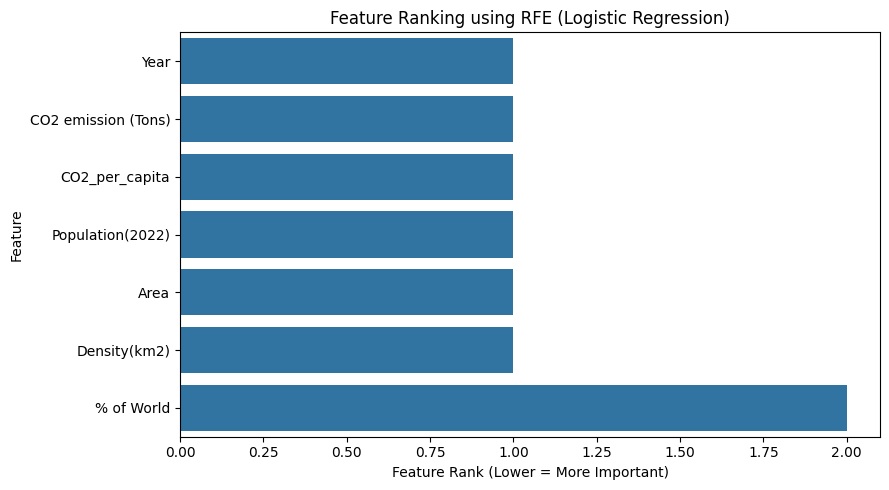

In [129]:
# viualizing the ranking

plt.figure(figsize=(9, 5))
sns.barplot(
    x="Ranking",
    y="Feature",
    data=feature_ranking
)

plt.title("Feature Ranking using RFE (Logistic Regression)")
plt.xlabel("Feature Rank (Lower = More Important)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [130]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree RFE
dtr = DecisionTreeClassifier(random_state=42)
rfe_dt = RFE(estimator=dtr, n_features_to_select=5)  # select top 3 features
rfe_dt.fit(X_train, y_train)

selected_features_dt = X_train.columns[rfe_dt.support_]
# feature ranking table
feature_ranking_dt = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe_dt.ranking_,
    "Selected": rfe_dt.support_
}).sort_values("Ranking")


print("\nDecision Tree Selected Features:", list(selected_features_dt))
print("\nDecision Tree Feature Ranking:\n", feature_ranking_dt)


Decision Tree Selected Features: ['CO2_per_capita', 'Population(2022)', 'Area', '% of World', 'Density(km2)']

Decision Tree Feature Ranking:
                Feature  Ranking  Selected
3     Population(2022)        1      True
2       CO2_per_capita        1      True
5           % of World        1      True
4                 Area        1      True
6         Density(km2)        1      True
1  CO2 emission (Tons)        2     False
0                 Year        3     False


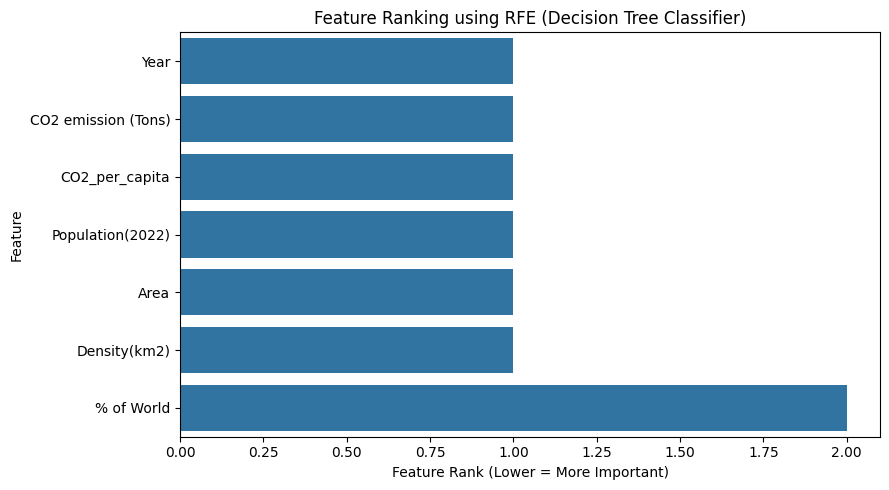

In [131]:
# viualizing the ranking

plt.figure(figsize=(9, 5))
sns.barplot(
    x="Ranking",
    y="Feature",
    data=feature_ranking
)

plt.title("Feature Ranking using RFE (Decision Tree Classifier)")
plt.xlabel("Feature Rank (Lower = More Important)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


A wrapper-based feature selection approach using Recursive Feature Elimination (RFE) with Logistic Regression was applied. Seven numerical features were initially considered. The top five most relevant features were selected based on model coefficients. The model trained using the selected features achieved simmilar yet highly acccurate results. this outcome is due to small number of features. hence we can use all th e7 out of 7 features to built our models.

In [132]:
# ======================================================================
# MODEL Tunning
# ======================================================================

print("="*70)
print("MODEL Tunning")
print("="*70)

MODEL Tunning


In [133]:
X = df[[
    "Year",
    "CO2 emission (Tons)",
    "CO2_per_capita",
    "Population(2022)",
    "Area",
    "% of World",
    "Density(km2)"
]]
y = df["Emission_Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [134]:
from sklearn.model_selection import GridSearchCV

# Example: Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],   # safer for large datasets
    'solver': ['lbfgs', 'liblinear']
}

grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',      # or 'roc_auc'
    n_jobs=-1
)

grid_lr.fit(X_train, y_train)
grid_lr.best_params_, grid_lr.best_score_
# best_lr = grid_lr.best_estimator_
# pd.Series(best_lr.coef_[0], index=X_train_scaled.columns).sort_values(ascending=False)


({'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'},
 np.float64(0.9999769372693728))

In [135]:
# Example: Decision Tree
param_grid_tree = {
    'max_depth': [ 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_tree.fit(X_train, y_train)
grid_tree.best_params_, grid_tree.best_score_


({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 np.float64(0.9999538745387454))

In [136]:
# ======================================================================
# TRAINING MODEL USING SELECTED FEATURES AND TUNNED PARAMETERS
# ======================================================================

print("="*70)
print("TRAINING MODEL USING SELECTED FEATURES AND TUNNED PARAMETERS")
print("="*70)


TRAINING MODEL USING SELECTED FEATURES AND TUNNED PARAMETERS


In [137]:
X = df[selected_features]
y = df["Emission_Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [138]:
X = df[[
    "Year",
    "CO2 emission (Tons)",
    "Population(2022)",
    "Area",
    "% of World",
    "Density(km2)"
]]
y = df["Emission_Class"]


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [139]:
# re traning models using tuned hyperparameters
# Logistic Regression with best params
best_lr = LogisticRegression(**grid_lr.best_params_,class_weight='balanced', max_iter=1000)
best_lr.fit(X_train_scaled, y_train)

# Decision Tree with best params
best_tree = DecisionTreeClassifier(**grid_tree.best_params_,class_weight='balanced', random_state=42)
best_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [140]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Logistic Regression
y_pred_lr = best_lr.predict(X_test_scaled)
y_prob_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

# Decision Tree
y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

# Metrics
metrics_lr = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, zero_division=0),
    "Recall": recall_score(y_test, y_pred_lr, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_lr, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_prob_lr)
}

metrics_tree = {
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree, zero_division=0),
    "Recall": recall_score(y_test, y_pred_tree, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_tree, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_prob_tree)
}




comparison_df = pd.DataFrame([metrics_nn, metrics, metrics_tree],
                             index=["Neural Network","Logistic Regression ", "Decision Tree "])
print(comparison_df)


                      Accuracy  Precision    Recall  F1-Score   ROC-AUC
Neural Network        0.999446   0.875000  0.583333  0.700000  0.999861
Logistic Regression   0.999908   0.923077  1.000000  0.960000  1.000000
Decision Tree         0.997878   0.333333  0.916667  0.488889  0.957317
